## Big data analytics: Big Data Bowl 
Authored by Jason Maloney and Jesse Pezzillo

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# This dataset can be downloaded from https://www.kaggle.com/c/nfl-big-data-bowl-2020/data after an agreement is digitally signed through kaggle. 
data = pd.read_csv('train.csv')
#lower all columns
data.columns = map(str.lower, data.columns)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### View the data and types

In [6]:
print(data.dtypes)

gameid                      int64
playid                      int64
team                       object
x                         float64
y                         float64
s                         float64
a                         float64
dis                       float64
orientation               float64
dir                       float64
nflid                       int64
displayname                object
jerseynumber                int64
season                      int64
yardline                    int64
quarter                     int64
gameclock                  object
possessionteam             object
down                        int64
distance                    int64
fieldposition              object
homescorebeforeplay         int64
visitorscorebeforeplay      int64
nflidrusher                 int64
offenseformation           object
offensepersonnel           object
defendersinthebox         float64
defensepersonnel           object
playdirection              object
timehandoff   

In [7]:
data.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,...,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


#### Player height

In [104]:
# create function to convert playerHeight to inches
def heightToInches(x):
    try:
        x,x1 = x.split('-')
        x = int(x)
        x1 = int(x1)
        x = (12*x) + x1
        return(x)
    except:
        return int(x*12)

In [105]:
# run function over column
data["playerheight"] = data["playerheight"].apply(heightToInches)

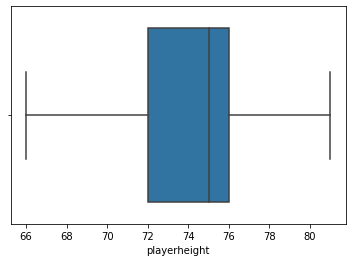

In [106]:
sns.boxplot(data["playerheight"])
plt.show()

#### Player age

In [107]:
# convert TimeHandoff to dates and times
data['timehandoff'] = pd.to_datetime(data['timehandoff'])
data['timesnap'] = pd.to_datetime(data['timesnap'])
data['playerbirthdate'] = pd.to_datetime(data["playerbirthdate"])
# confirm dtype
print('handoff time:',data["timehandoff"].dtype)
print('snap time:',data["timesnap"].dtype)
print('playerbirthdate',data["playerbirthdate"].dtype)

handoff time: datetime64[ns, UTC]
snap time: datetime64[ns, UTC]
playerbirthdate datetime64[ns]


In [108]:
# generate age of each player
def birthDayCalc(df):
    birthDay = df[0].year
    timeHandoff = df[1].year
    age = (timeHandoff - birthDay) 
    return age
data["age"] = data[["playerbirthdate","timehandoff"]].apply(birthDayCalc, axis=1)

KeyboardInterrupt: 

In [ ]:
sns.boxplot(data["age"])
plt.show()
print("Player anomolies/Old dudes:")
data['displayname'][data["age"] > 36].unique()

#### Windspeed

In [14]:
# convert windspeed
def windConvert(x):
    try:
        x = re.match('[0-9]+',x)
        x = x.groups()
        for i in x:
            y += i
            return(y)
    except:
        return(x)
data["windspeed"] = data["windspeed"].apply(windConvert)
# set NAN to 0
#data["windspeed"] = data["windspeed"].fillna(value=0)
# set to integer
# data["windspeed"] = data["windspeed"].astype(int)

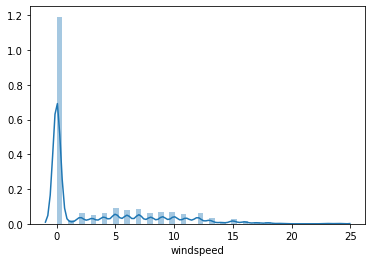

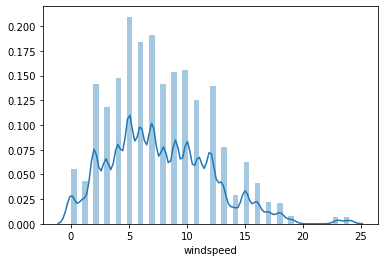

In [15]:
# plot with na's set to 0
sns.distplot(data["windspeed"].fillna(value=0))
plt.show()
# plot with no na's
sns.distplot(data["windspeed"].dropna())
plt.show()

In [109]:
# create a rusher dummy variable
data['rusher'] = 0
data['rusher'][data['nflid'] == data['nflidrusher']] = 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Orientation and Direction

In [110]:
# create functions to fix oreintation and direction
# Refrenced this notebook to help understand how to modify https://www.kaggle.com/ben519/understanding-x-y-dir-and-orientation
def fixDir(x):
    y = (360-x+90) % 360
    return y
def fixOri(x):
    y = (360-x) % 360
    return y

In [111]:
# apply oreintation fix
data["orientation"][data["season"] == 2017] = data["orientation"][data["season"] == 2017].apply(fixOri)
# apply direction fix
data["dir"] = data["dir"].apply(fixDir)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Distance to the Rusher

In [112]:
# get Rusher X and Y
pos_df = pd.DataFrame(zip(data['x'][data['rusher'] == 1], data['y'][data['rusher'] == 1]), columns = ['x', 'y'])
pos_df.head()

,x,y
0,78.75,30.53
1,71.07,27.16
2,48.66,19.11
3,15.53,25.36
4,29.99,27.12


In [113]:
# need to get each value repeated 22 times, for each player in each play
posdf = pd.DataFrame(zip(pos_df['x'].repeat(22), pos_df['y'].repeat(22)), index = range(len(data)), columns = ['rushx', 'rushy'])
# put the rushX and rushY in the main df
data['rushx'] = posdf['rushx']
data['rushy'] = posdf['rushy']

In [114]:
# euclidean dist = sqrt((x1 - x2)^2 + (y1 - y2)^2) - straight line distance
data['disttorush'] = np.sqrt((data['x'] - data['rushx'])**2 + (data['y'] - data['rushy'])**2)
data.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,ol,dl,lb,db,rb,ol_d,rb_d,qb,te,wr,dl_o,lb_o,db_o,rusher,rushx,rushy,disttorush
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,278.01,272.82,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,72,212,1988-12-29,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,5,2,3,6,1,0,0,1,1,3,0,0,0,0,78.75,30.53,6.480872
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,332.39,251.30,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,288,1989-03-25,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,5,2,3,6,1,0,0,1,1,3,0,0,0,0,78.75,30.53,4.593310
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,356.99,247.27,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,270,1989-01-21,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,5,2,3,6,1,0,0,1,1,3,0,0,0,0,78.75,30.53,5.448982
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,0.23,344.36,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,245,1982-11-22,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,5,2,3,6,1,0,0,1,1,3,0,0,0,0,78.75,30.53,7.820038
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,347.37,285.69,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,72,206,1987-08-17,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,5,2,3,6,1,0,0,1,1,3,0,0,0,0,78.75,30.53,10.622476


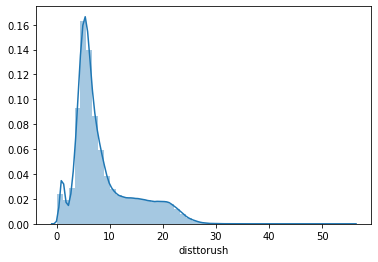

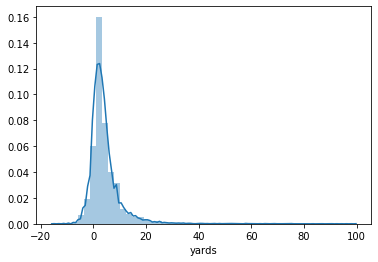

In [115]:
# distribution of players' distance to rusher
sns.distplot(data['disttorush'][data['rusher'] == 0])
plt.show()

# distribution of yards gained/play
sns.distplot(data['yards'])
plt.show()

#### Offensive and Defensive Personnel 

In [116]:
# count defensive position
# differentiate defensive ol and offensive ol - JM
data["ol_d"] = data["defensepersonnel"].str.extract(pat="([1-9] OL)")
data["ol_d"] = data["ol_d"].str.extract(pat="([1-9])")
data["dl"] = data["defensepersonnel"].str.extract(pat="([1-9] DL)")
data["dl"] = data["dl"].str.extract(pat="([1-9])")
data["lb"] = data["defensepersonnel"].str.extract(pat="([1-9] LB)")
data["lb"] = data["lb"].str.extract(pat="([1-9])")
data["db"] = data["defensepersonnel"].str.extract(pat="([1-9] DB)")
data["db"] = data["db"].str.extract(pat="([1-9])")
# differentiate defensive rb and offensive rb - JM
data["rb_d"] = data["defensepersonnel"].str.extract(pat="([1-9] RB)")
data["rb_d"] = data["rb_d"].str.extract(pat="([1-9])")

In [117]:
# count offensive position
# QB, OL, RB, TE, WR, DL, LB, DB
data['qb'] = data['offensepersonnel'].str.extract(pat='([1-9] QB)')
data['qb'] = data['qb'].str.extract(pat='([1-9])')
data['ol'] = data['offensepersonnel'].str.extract(pat='([1-9] OL)')
data['ol'] = data['ol'].str.extract(pat='([1-9])')
data['rb'] = data['offensepersonnel'].str.extract(pat='(\d RB)')
data['rb'] = data['rb'].str.extract(pat='(\d)')
data['te'] = data['offensepersonnel'].str.extract(pat='(\d TE)')
data['te'] = data['te'].str.extract(pat='(\d)')
data['wr'] = data['offensepersonnel'].str.extract(pat='(\d WR)')
data['wr'] = data['wr'].str.extract(pat='(\d)')
# differentiate offensive dl - JM
data['dl_o'] = data['offensepersonnel'].str.extract(pat='(\d DL)')
data['dl_o'] = data['dl_o'].str.extract(pat='(\d)')
data['lb_o'] = data['offensepersonnel'].str.extract(pat='(\d LB)')
data['lb_o'] = data['lb_o'].str.extract(pat='(\d)')
data['db_o'] = data['offensepersonnel'].str.extract(pat='(\d DB)')
data['db_o'] = data['db_o'].str.extract(pat='(\d)')

In [118]:
# replace nas with 0
data['ol'].fillna(0, inplace = True)
data['dl'].fillna(0, inplace = True)
data['db'].fillna(0, inplace = True)
data['lb'].fillna(0, inplace = True)
data['rb'].fillna(0, inplace = True)
data['ol_d'].fillna(0, inplace = True)
data['rb_d'].fillna(0, inplace = True)
data['te'].fillna(0, inplace = True)
data['wr'].fillna(0, inplace = True)
data['dl_o'].fillna(0, inplace = True)
data['lb_o'].fillna(0, inplace = True)
data['db_o'].fillna(0, inplace = True)
# replace qb nas with 1 - WILDCAT has a qb, but the ball is snapped to someone else - JM
data['qb'].fillna(1, inplace = True)

In [119]:
# set ol == 0 to be 11 - sum(offensive personnel)
off = ['rb', 'qb', 'te', 'wr', 'dl_o', 'lb_o', 'db_o'] 
data[off] = data[off].astype(str).astype(int)
data['ol'][data['ol'] == 0] = 11 - data[off].sum(axis = 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [120]:
# convert rest of personnel to int
defp = ['dl', 'lb', 'rb_d', 'ol_d', 'db']
data[defp] = data[defp].astype(str).astype(int)
# fill lb na with 11 - sum(everyone else on defense)
data['lb'][data['lb'] == 0] = 11 - data[defp].sum(axis = 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [122]:
data[13109:131114]

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,ol,dl,lb,db,rb,ol_d,rb_d,qb,te,wr,dl_o,lb_o,db_o,rusher,rushx,rushy,disttorush
13109,2017091100,20170911001375,home,11.24,23.79,2.01,0.47,0.25,327.89,254.16,2552312,Eric Kendricks,54,2017,5,2,06:15:00,NO,3,5,MIN,3,3,2495466,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-12 00:01:42+00:00,2017-09-12 00:01:41+00:00,3,72,232,1992-02-29,UCLA,MLB,MIN,NO,1,U.S. Bank Stadium,"Minneapolis, MN",Indoors,Field Turf,Indoor,70.0,0.0,NaN,NaN,5,4,2,5,1,0,0,1,1,3,0,0,0,0,17.53,29.67,8.610372
13110,2017091100,20170911001375,home,10.57,37.71,0.02,0.04,0.00,351.54,226.16,2552448,Trae Waynes,26,2017,5,2,06:15:00,NO,3,5,MIN,3,3,2495466,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-12 00:01:42+00:00,2017-09-12 00:01:41+00:00,3,72,190,1992-07-25,Michigan State,CB,MIN,NO,1,U.S. Bank Stadium,"Minneapolis, MN",Indoors,Field Turf,Indoor,70.0,0.0,NaN,NaN,5,4,2,5,1,0,0,1,1,3,0,0,0,0,17.53,29.67,10.634058
13111,2017091100,20170911001375,home,16.84,35.15,1.62,2.13,0.26,253.33,282.32,2552603,Danielle Hunter,99,2017,5,2,06:15:00,NO,3,5,MIN,3,3,2495466,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-09-12 00:01:42+00:00,2017-09-12 00:01:41+00:00,3,77,252,1994-10-29,Louisiana State,DE,MIN,NO,1,U.S. Bank Stadium,"Minneapolis, MN",Indoors,Field Turf,Indoor,70.0,0.0,NaN,NaN,5,4,2,5,1,0,0,1,1,3,0,0,0,0,17.53,29.67,5.523269
13112,2017091100,20170911001543,away,86.15,30.79,0.52,1.04,0.10,176.06,17.13,71493,Max Unger,60,2017,25,2,04:02:00,NO,1,10,NO,10,6,2558019,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-12 00:11:55+00:00,2017-09-12 00:11:54+00:00,2,77,305,1986-04-14,Oregon,C,MIN,NO,1,U.S. Bank Stadium,"Minneapolis, MN",Indoors,Field Turf,Indoor,70.0,0.0,NaN,NaN,5,4,2,5,1,0,0,1,1,3,0,0,0,0,88.93,30.27,2.828215
13113,2017091100,20170911001543,away,91.23,30.00,1.98,0.50,0.24,103.77,358.09,2504775,Drew Brees,9,2017,25,2,04:02:00,NO,1,10,NO,10,6,2558019,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-12 00:11:55+00:00,2017-09-12 00:11:54+00:00,2,72,209,1979-01-15,Purdue,QB,MIN,NO,1,U.S. Bank Stadium,"Minneapolis, MN",Indoors,Field Turf,Indoor,70.0,0.0,NaN,NaN,5,4,2,5,1,0,0,1,1,3,0,0,0,0,88.93,30.27,2.315794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131109,2017110507,20171105073302,home,49.38,33.99,3.50,0.34,0.37,345.52,97.33,496822,Earl Mitchell,90,2017,40,3,02:39:00,ARZ,2,7,SF,10,14,2507164,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-11-05 23:25:48+00:00,2017-11-05 23:25:47+00:00,2,75,310,1987-09-25,Arizona,NT,SF,ARI,9,Levis Stadium,"Santa Clara, CA",Outdoor,Natural grass,Sunny,61.0,48.0,8,NW,5,4,2,5,1,0,0,1,1,3,0,0,0,0,55.79,32.82,6.515904
131110,2017110507,20171105073302,home,46.75,16.97,1.81,2.11,0.18,44.15,141.82,2495617,Leon Hall,20,2017,40,3,02:39:00,ARZ,2,7,SF,10,14,2507164,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",left,2017-11-05 23:25:48+00:00,2017-11-05 23:25:47+00:00,2,71,195,1984-12-09,Michigan,CB,SF,ARI,9,Levis Stadium,"Santa Clara, CA",Outdoor,Natural grass,Sunny,61.0,48.0,8,NW,5,4,2,5,1,0,0,1,1,3,0,0,0,0,55.79,32.82,18.246756
131111,2017110507,20171105073302,home,51.33,35.73,1.48,1.54,0.25,313.68,64.10,2507373,Leger Douzable,92,2017,40,3,02:39:00,ARZ,2,7,SF,10,14,2507164,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB

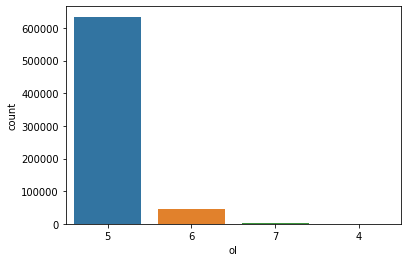

In [123]:
# distritbution of ol/play
sns.countplot(data['ol'])

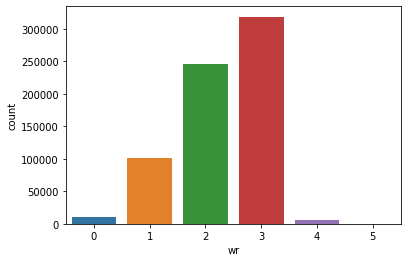

<function matplotlib.pyplot.show(*args, **kw)>

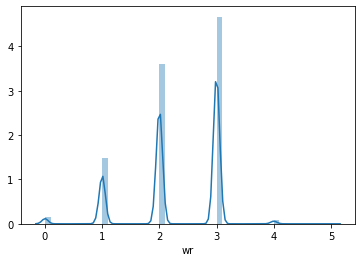

In [126]:
# distribution of wr/play
sns.countplot(data['wr'])
plt.show()

sns.distplot(data['wr'])
plt.show

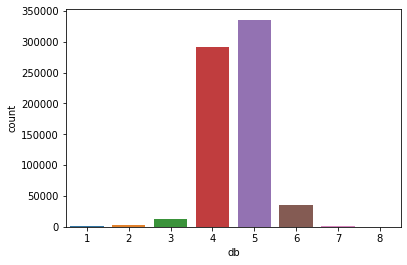

In [128]:
# distribution of db/play
sns.countplot(data['db'])